## Clustering Assignment
1) Data Quality Check

2) EDA

3) Outlier Analysis

4) Scaling

5) Hopkins, Silhoutte and Elbow Curve

6) K-Means Application and Visualisation

7) Hierarchical Clustering and Visualisation

8) Final Conclusion

## 1. Data Quality Check

In [1]:
# Import libraries

import pandas as pd
import numpy as np

#import the warnings.

import warnings
warnings.filterwarnings('ignore')

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scaling
from sklearn.preprocessing import scale

# KMeans clustering 
from sklearn.cluster import KMeans

# Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
# Reading data

country_data=pd.read_csv(r'D:\Data Science\Data Analytics\Upgrad\Clustering Assignment\Sam/Country-data.csv')
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
# Finding out number of rows and columns
country_data.shape

(167, 10)

In [4]:
# Checking mean, 25%,50%,75% percentile
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Checking NULL values
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### There are no Null values

In [6]:
#Converting percentage columns to actual values.
country_data['exports']=country_data['exports']*country_data['gdpp']/100
country_data['health']=country_data['health']*country_data['gdpp']/100
country_data['imports']=country_data['imports']*country_data['gdpp']/100

In [7]:
# Checking dataset
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 2. EDA

### Univariate Analysis

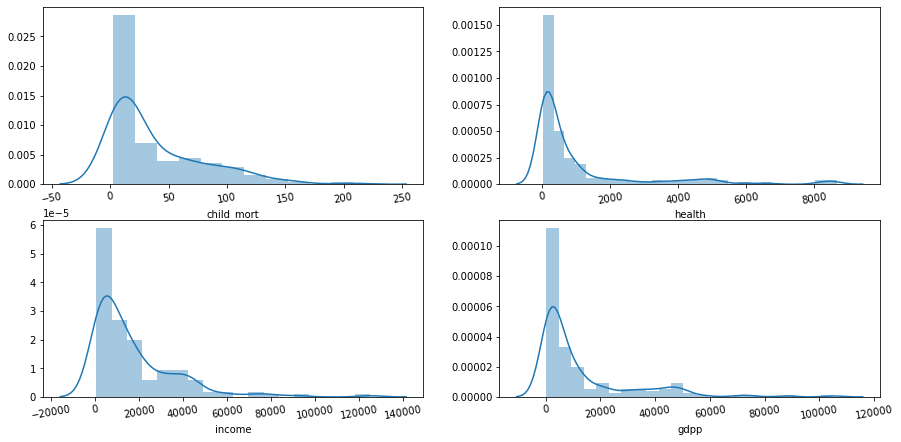

In [8]:
# Plotting displot and histogram of 'child mort','health','income', 'gdpp' to visulaize the numerical data and to find the error 
# terms are normally distributed

plt.figure(figsize=(15,15))
element=['child_mort' , 'health' , 'income' , 'gdpp']
for i in enumerate(element):
    ax = plt.subplot(4,2, i[0]+1)
    sns.distplot(country_data[i[1]])
    plt.xticks(rotation=10)


## From the above distplot, we can infer that all the variables are showing similar types of variations

### Bi Variate Analysis

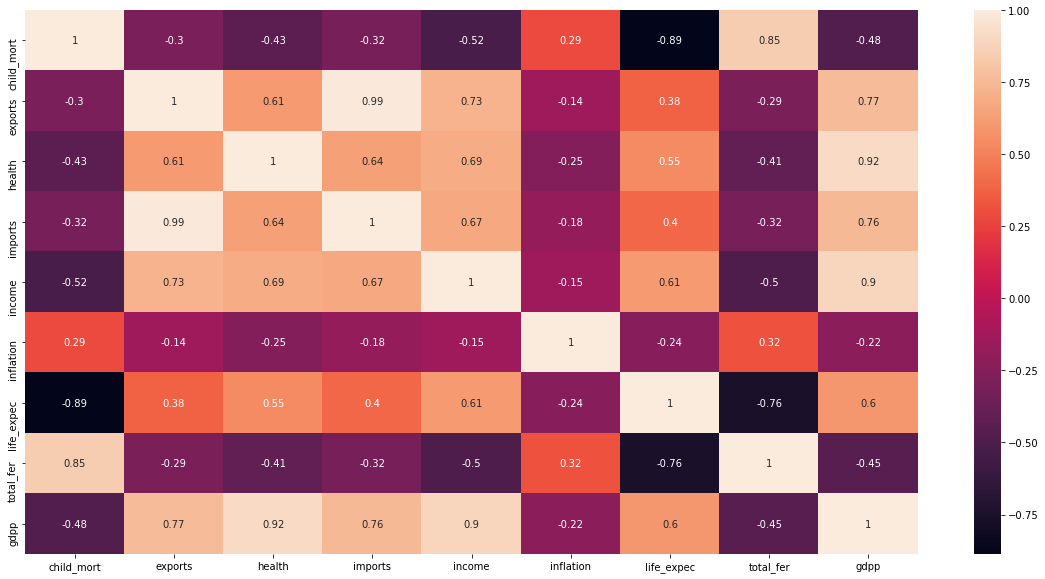

In [9]:
# plot the correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(country_data.corr(),annot = True)
plt.show()

## The lighter shade corelates to higher correlation. For e.g Higher the 'GDPP', higher is the 'health', higher the 'GDPP', higher is the 'income'

## The darker shade correlates to negative correlation. That means if value of one variable increases, the value of other variable will decrease and vice versa. For e.g 'Child mort' and 'life_expec', 'total_fer' and 'child_mort'

# 3. Outlier Analysis

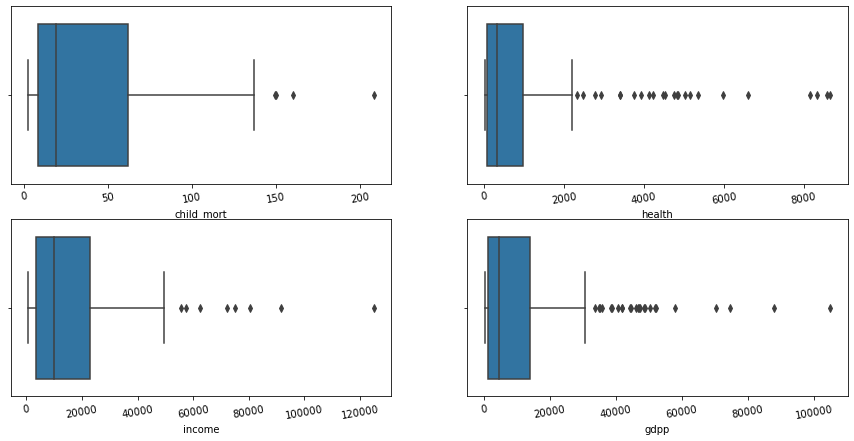

In [10]:
# Plotting subplot to check for outliers
plt.figure(figsize=(15,15))
element=['child_mort' , 'health' , 'income' , 'gdpp']
for i in enumerate(element):
    ax = plt.subplot(4,2, i[0]+1)
    sns.boxplot(country_data[i[1]])
    plt.xticks(rotation=10)

## Here I can see that there are number of outliers in  'health' , 'income' , 'gdpp' and few outliers in 'child_mort'

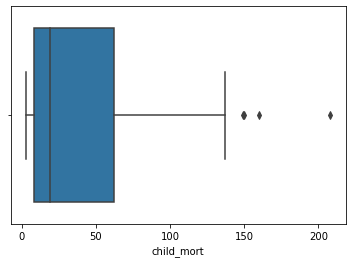

In [11]:
# performing the capping technique for child_mort with soft range to replace extreme values with acceptable limits
# For 'child_mort', we have to deal with lower range outlier and not upper range outlier as the countries having 
# high 'child_mort' need aid

Q1 = country_data['child_mort'].quantile(0.01)

country_data['child_mort'][country_data['child_mort'] <= Q1]= Q1

sns.boxplot(x= 'child_mort' , data= country_data)
plt.show()

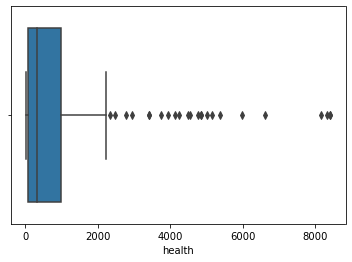

In [12]:
# performing the capping technique for 'health' with soft range to replace extreme values with acceptable limits
# For 'health', we have to deal with upper range outlier

Q2 = country_data['health'].quantile(0.99)

country_data['health'][country_data['health'] >= Q2]= Q2

sns.boxplot(x= 'health' , data= country_data)
plt.show()

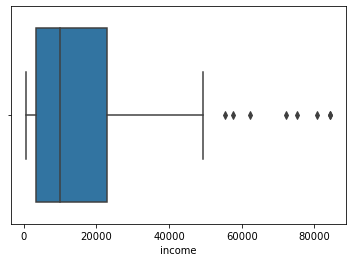

In [13]:
# performing the capping technique for 'income' with soft range to replace extreme values with acceptable limits

Q2 = country_data['income'].quantile(0.99)

country_data['income'][country_data['income'] >= Q2]= Q2

sns.boxplot(x= 'income' , data= country_data)
plt.show()

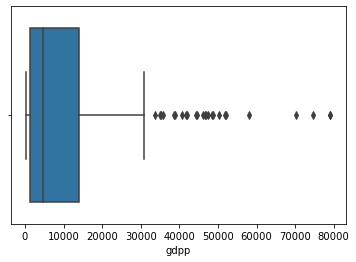

In [14]:
# performing the capping technique for 'gdpp' with soft range to replace extreme values with acceptable limits

Q2 = country_data['gdpp'].quantile(0.99)

country_data['gdpp'][country_data['gdpp'] >= Q2]= Q2

sns.boxplot(x= 'gdpp' , data= country_data)
plt.show()

## Outlier treatment in this case is done without any hard range to avoid dropping too much of countries which might actually need aid

In [15]:
# drop the country column to make sure all columns are int values
country_data_1=country_data.drop(['country'],axis=1)
country_data_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


# 4. Scaling the Dataset

In [16]:
# apply the StandardScaler on country_data_1 data frame
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data_1 = standard_scaler.fit_transform(country_data_1)

In [17]:
# Convert the numpy array into Dataframe
country_data_1= pd.DataFrame(country_data_1)
country_data_1.columns = ["child_mort" , "exports" , "health" , "imports" , "income" , "inflation" , "life_expec" , "total_fer" , "gdpp"]
country_data_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.411011,-0.566958,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538993,-0.350191,-0.440393,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272870,-0.318526,-0.486271,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007831,-0.291375,-0.534088,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695682,-0.104331,-0.178410,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042


# 5a. Hopkins Statistics

In [18]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [19]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars)
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
country_data_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.411011,-0.566958,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538993,-0.350191,-0.440393,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272870,-0.318526,-0.486271,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007831,-0.291375,-0.534088,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695682,-0.104331,-0.178410,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042


In [21]:
# A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5
# and uniformly distributed data will tend to result in values close to 0

hopkins(country_data_1)

0.9056821024304371

## Since the Hopkins value is close to 1, so the data is highly clustered

# Now K-Means Clustering

## 5b. Silhoutte Analysis

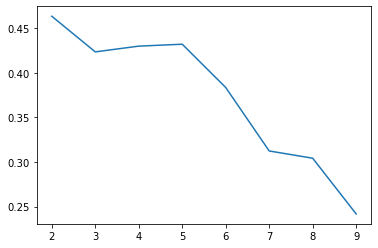

In [22]:
#Silhouette Score Analysis
from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,10):
    kmeans= KMeans(n_clusters = k).fit(country_data_1)
    ss.append([k, silhouette_score(country_data_1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

## The Silhouette plot shows that the silhouette coefficient is highest when k=2 suggesting the optimal number of clusters

## 5c. Elbow Curve

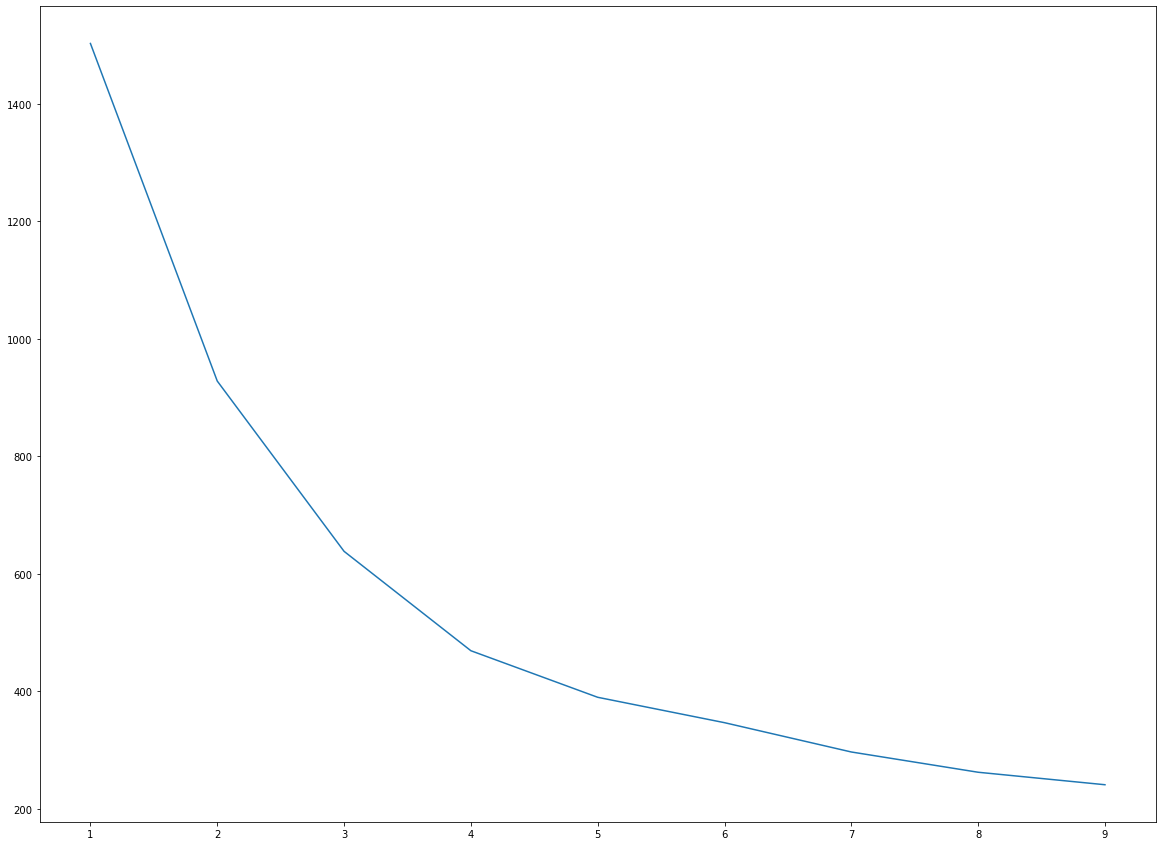

In [23]:
# Looking at the elbow-curve
ssd=[]
for k in list(range(1,10)):
    model = KMeans(n_clusters = k , max_iter=50).fit(country_data_1)
    ssd.append([k, model.inertia_])
plt.figure(figsize=(20,15))    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

### Here I have to select the value of k at the 'elbow' that is the point after which the distortion/inertia start decreasing in a linear fashion. Here I can conclude that the optimal number of clusters for the data is 4

# 6 K-Means Application and Visualisation

### K-means Clustering with the value K=3

In [24]:
# KMeans clustering using value k=3
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 3, random_state=0)
kmean.fit(country_data_1)

KMeans(n_clusters=3, random_state=0)

In [25]:
# Now we can look for labels
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [26]:
# Now I will add labels to the original dataframe i.e 'country_data'

country_data['cluster_id']=kmean.labels_

In [27]:
# Checking data
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [28]:
# Check number of data points in each cluster

country_data['cluster_id'].value_counts()

1    91
0    48
2    28
Name: cluster_id, dtype: int64

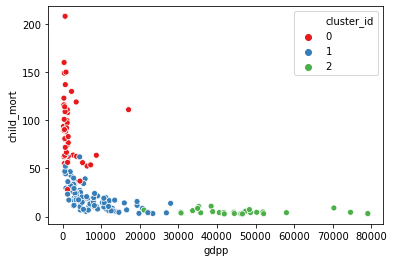

In [29]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'gdpp' , y= 'child_mort' , hue='cluster_id' , legend='full' , data=country_data , palette='Set1')
plt.show()

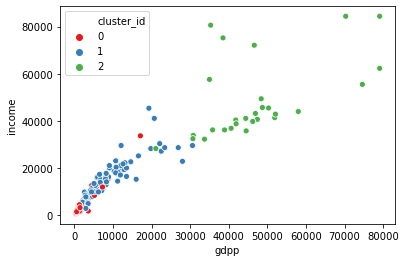

In [30]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'gdpp' , y= 'income' , hue='cluster_id' , legend='full' , data=country_data , palette='Set1')
plt.show()

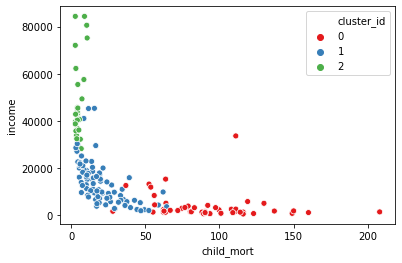

In [31]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'child_mort' , y= 'income' , hue='cluster_id' , legend='full' , data=country_data , palette='Set1')
plt.show()

### Cluster Profiling K-Means

### Now I will create the definition for the cluster i.e providing the names to the cluster based on segregation
### So any clustering process is incomplete without Cluster profiling because finally want to find the groups in the data and also need to understand what is the meaning of each group i.e those countries which are in dire need of aid

In [32]:
# Checking data
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [33]:
# Finding the mean of 'child_mort', 'income' and 'gdpp'
country_data[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,91.610417,3897.354167,1909.208333
1,20.357143,13968.021978,7979.912088
2,5.053571,48466.000000,46877.714286


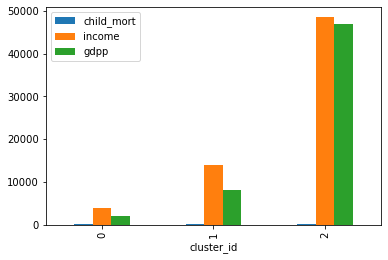

In [34]:
# Now plotting the bar plot for 'child_mort', 'income' and 'gdpp'

country_data[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
plt.show()

### From above plots we see that Cluster 0 is the cluster with High child_mort, Low income and Low gdpp

## Find the Countries

### Once the cluster has been identified, I am required to find the top 5 countries that are actually in requirement of the AID

In [35]:
# Storing 'cluster_id'=0 in c1 

c1=country_data[country_data['cluster_id']==0]

In [36]:
# Checking c1 data

c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [37]:
# Sorting c1 on the basis of 'gdpp','child_mort','income'

c1.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0


## By analysing the clusters, we can conclude that countries such as 'Burundi','Liberia' , 'Congo,Dem. Rep' , 'Niger' & 'Sierra Leone' are in dire need of AID

# 7. Hierarchical Clustering Application and Visualisation

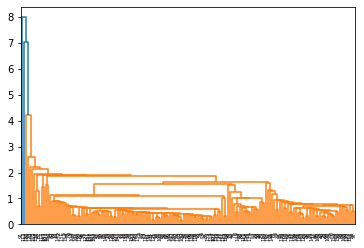

In [38]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
data3_1 = standard_scaler.fit_transform(country_data.drop(['country'],axis=1))

# Single Linkage
mergings = linkage(data3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

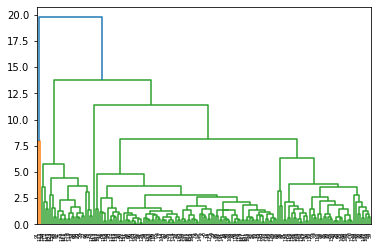

In [39]:
# Complete Linkage
mergings = linkage(data3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [40]:
# Now we can look for labels

clusterCut = cut_tree(mergings, n_clusters = 5).reshape(-1,)
clusterCut

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [41]:
# Adding 'cluster_id' to the original data set
country_data['cluster_id']=clusterCut
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [42]:
# Check number of data points in each cluster
country_data['cluster_id'].value_counts()

1    91
0    47
2    26
3     2
4     1
Name: cluster_id, dtype: int64

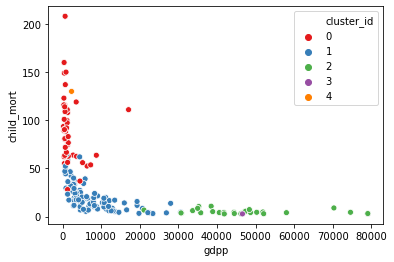

In [43]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'gdpp' , y= 'child_mort' , hue='cluster_id' , legend='full' , data=country_data , palette='Set1')
plt.show()

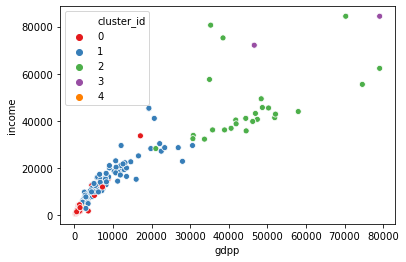

In [44]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'gdpp' , y= 'income' , hue='cluster_id' , legend='full' , data=country_data , palette='Set1')
plt.show()

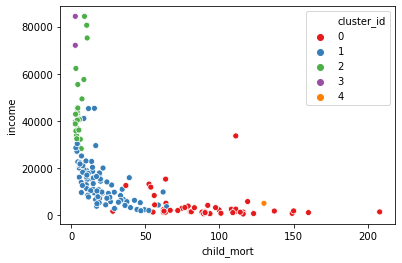

In [45]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'child_mort' , y= 'income' , hue='cluster_id' , legend='full' , data=country_data , palette='Set1')
plt.show()

#### Cluster Profiling - Hierarchical

In [46]:
# Checking data
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [47]:
# Finding the mean of 'child_mort', 'income' and 'gdpp'
country_data[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,90.793617,3870.702128,1900.255319
1,20.357143,13968.021978,7979.912088
2,5.226923,46175.923077,45649.538462
3,2.800000,78237.000000,62844.000000
4,130.000000,5150.000000,2330.000000


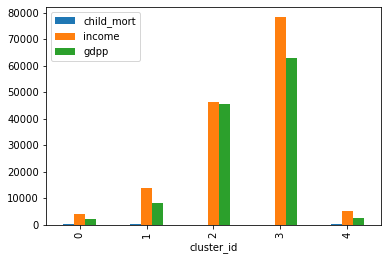

In [48]:
# Now plotting the bar plot for 'child_mort', 'income' and 'gdpp'

country_data[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
plt.show()

#### From above plots we see that Cluster 2 is the cluster with high child_mort, low income and low gdpp.

## Finding Countries on the basis of Hierarchical Clustering

### Once the cluster has been identified, I am required to find the top 5 countries that are actually in requirement of the AID

In [49]:
# Assigning 'cluster_id'=2 to c2
c2=country_data[country_data['cluster_id']==2]

In [50]:
# Checking c2
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
7,Australia,4.8,10276.2,4530.87,10847.1,41400.0,1.160,82.0,1.93,51900.0,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200.0,0.873,80.5,1.44,46900.0,2
15,Belgium,4.5,33921.6,4750.80,33166.8,41100.0,1.880,80.0,1.86,44400.0,2
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.700,77.1,1.84,35300.0,2
29,Canada,5.6,13793.4,5356.20,14694.0,40700.0,2.870,81.3,1.63,47400.0,2


### By analysing the clusters using Hierarchical Clustering, we can conclude that 'Luxembourg' is in dire need of AID
 

# 8.Final Conclusion

## Since I have a precise list of countries from K-Means clustering , so considered the following list of atleast 5 countries which are in dire need of AID

-  'Burundi'**
-  'Liberia'
-  'Congo,Dem. Rep'
-  'Niger'
-  'Sierra Leone' 